## Homework 2: Dice Rolling and Convolution
#### Kevin J. Wang

1: When rolling 2 six-sided dice, rolling a sum of seven is more probable than rolling snake eyes (2 ones). The ratio of probabilities is 6 to 1. 

2: The probability distribution for the sum of 2 six-sided dice is the convolution of the distributions for individual dice. So, we do  
$P_{sum}(x) = f(x) * g(x) = \sum_{n=1}^{6} f(n)g(x-n)$  
where 
$$
f(x) = g(x) = 
\begin{cases}
      1/6 & x={1,2,3,4,5,6} \\
      0 & elsewhere \\
\end{cases}
$$
This gives us $P_{sum}(x) = \sum_{n=1}^{6} \frac{1}{6} g(x-n)$ which we can evaluate for x=2 to x=12:  
$P_{sum}(2) = 1/36$  
$P_{sum}(3) = 2/36$  
$P_{sum}(4) = 3/36$  
$P_{sum}(5) = 4/36$  
$P_{sum}(6) = 5/36$  
$P_{sum}(7) = 6/36$  
$P_{sum}(8) = 5/36$  
$P_{sum}(9) = 4/36$  
$P_{sum}(10) = 3/36$  
$P_{sum}(11) = 2/36$  
$P_{sum}(12) = 1/36$  
This is a very tedious way to do this using mathmatical equations. However, Professor Morales also showed us a great intuitive way to do this exact same problem in Lecture 4.

To do this using Python code, one can use the scipy.signal.convolve(in1, in2) function:

In [42]:
import matplotlib
import matplotlib.pyplot as plt
import scipy.signal
from scipy import stats

f = [1/6, 1/6, 1/6, 1/6, 1/6, 1/6]
probs = scipy.signal.convolve(f, f)
probs

array([0.02777778, 0.05555556, 0.08333333, 0.11111111, 0.13888889,
       0.16666667, 0.13888889, 0.11111111, 0.08333333, 0.05555556,
       0.02777778])

Now that we have a list of probabilities, we must be careful to match them with the right sum.

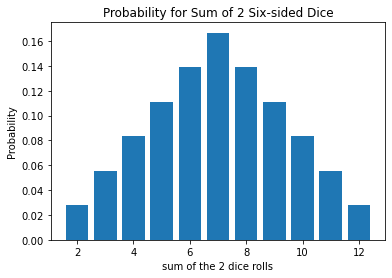

In [43]:
dice_rolls = range(2,13)
fig, ax = plt.subplots(1, 1)
ax.set_title("Probability for Sum of 2 Six-sided Dice")
ax.bar(dice_rolls, probs)
ax.set_xlabel('sum of the 2 dice rolls')
ax.set_ylabel('Probability')
plt.show()

3: To find the mean of the distribution in problem 2, one can see that it is symmetrical, so the middle value of 7 is the mean u. To calculate this mathematically, take the weighted sum of all the possible roll results.

In [44]:
mean_sum = 0
for i in range(len(dice_rolls)):
    mean_sum += (dice_rolls[i] * probs[i])
print("u = " + str(mean_sum))

u = 7.0


To find the variance, use the formula $Var(P_{sum}) = \sum_{n=1}^{11} p_n \cdot (x_n - u)^2 $  
where p is the list of probabilities, x is the list of roll results, and u is the expected value/mean.

In [45]:
variance = 0
for n in range(len(dice_rolls)):
    variance += probs[n] * (dice_rolls[n] - mean_sum)**2
print("variance = " + str(variance))

variance = 5.833333333333334


4: To roll 10 six-sided dice and find the probability distribution for the average, convolve 10 single die probability distributions together, and then divide the dice roll sums by 10 to get the average instead of the sum.

In [46]:
f = [1/6, 1/6, 1/6, 1/6, 1/6, 1/6]
conv_result = f.copy()
for i in range(9):
    conv_result = scipy.signal.convolve(conv_result, f)
conv_result

array([1.65381717e-08, 1.65381717e-07, 9.09599443e-07, 3.63839777e-06,
       1.18247928e-05, 3.31094197e-05, 8.26081676e-05, 1.87542867e-04,
       3.92946959e-04, 7.67701930e-04, 1.40951530e-03, 2.44665712e-03,
       4.03407353e-03, 6.34189270e-03, 9.53533096e-03, 1.37465945e-02,
       1.90415547e-02, 2.53867551e-02, 3.26236936e-02, 4.04573294e-02,
       4.84643679e-02, 5.61241048e-02, 6.28704385e-02, 6.81581055e-02,
       7.15327194e-02, 7.26928060e-02, 7.15327194e-02, 6.81581055e-02,
       6.28704385e-02, 5.61241048e-02, 4.84643679e-02, 4.04573294e-02,
       3.26236936e-02, 2.53867551e-02, 1.90415547e-02, 1.37465945e-02,
       9.53533096e-03, 6.34189270e-03, 4.03407353e-03, 2.44665712e-03,
       1.40951530e-03, 7.67701930e-04, 3.92946959e-04, 1.87542867e-04,
       8.26081676e-05, 3.31094197e-05, 1.18247928e-05, 3.63839777e-06,
       9.09599443e-07, 1.65381717e-07, 1.65381717e-08])

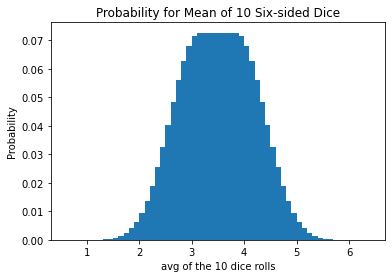

In [47]:
dice_sums = range(10,61)
dice_avgs = list(dice_sums)
for i in range(len(dice_avgs)):
    dice_avgs[i] = dice_avgs[i] / 10
fig, ax = plt.subplots(1, 1)
ax.set_title("Probability for Mean of 10 Six-sided Dice")
ax.bar(dice_avgs, conv_result)
ax.set_xlabel('avg of the 10 dice rolls')
ax.set_ylabel('Probability')
plt.show()

This looks somewhat like a gaussian distribution, but not exactly, since the top of the curve is flat, and the curve has maximum and minimum values of 1 and 6 instead of +- infinity.

5: 